# KMeans

In this short course we are going to dive into some of the concepts surrounding the KMeans algorithm. This algorithm is a classic that you will learn very early on with machine learning which is meant to cluster together data. What this means is that given a set of data points, we can specify n clusters we would like, and this algorithm works to make those n clusters where the points within the clusters are as similar as possible and the clusters versus other clusters are as different as possible. The structure of this course is as follows:

1. Intro: We dive right into the algorithm and see how it can be used to cluster for images by using a pre-built version of algorithm. This is meant to just be an overview to give you an idea of where we are headed. Other lessons will go much more in depth.
2. Building the Algorithm: We take a step back and build the algorithm ourselves to enhance our knowledge.
3. Visualizing the Algorithm: We use visualization to drive home to concepts of what exactly is happening in this clustering technique.
4. Normalization: We learn the importance of normalization techniques as applied to clustering.

Now the first thing we have to worry about is simply reading in our data. In the github repository for this course, you can find and download the picture called Dogs.jpg. Once you have done that and put it in the folder you are writing your notebook with, we can read this image in with the help of plt.imread from matplotlib. This function will read a picture and return an 3D array corresponding to all the pixels.

In [1]:
import matplotlib.pyplot as plt

#Read the image in, notice the format
img = plt.imread('Dogs.jpg')
print(img)

[[[ 1  1  0]
  [ 1  1  0]
  [ 0  0  0]
  ...
  [ 2  0  1]
  [14 10  9]
  [16  7  8]]

 [[ 2  2  0]
  [ 2  2  0]
  [ 1  1  0]
  ...
  [ 1  0  0]
  [23 19 18]
  [32 23 24]]

 [[ 1  1  0]
  [ 3  3  1]
  [ 2  2  0]
  ...
  [ 1  0  0]
  [38 34 33]
  [55 46 47]]

 ...

 [[ 0  2  1]
  [ 0  2  1]
  [ 1  1  0]
  ...
  [86 82 79]
  [ 1  0  0]
  [ 3  3  1]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [83 79 76]
  [ 2  1  0]
  [ 4  4  2]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [85 81 78]
  [ 2  1  0]
  [ 3  3  1]]]


In [2]:
#The shape is 3D because it is an array with RGB colors
print(img.shape)

(450, 600, 3)


With the picture loaded as a 3D array, we might want to also see how we can reverse this action. The plt.imshow function takes this data and returns back an actual picture. One thing to note here, we want to give a vmin/max which just says the maximum values assumed for the RGB pixels. This means that our values will be between 0 and 255, and to map them as such when using imshow.

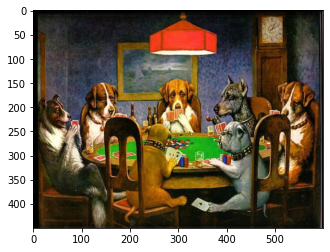

In [3]:
#The imshow function with plot shows the image
#We use vmin and vmax as 0 and 255 because pixel's can be between 0-255 for each of the RGB values
plt.imshow(img, vmin=0,
    vmax=255)
plt.show()

The reason I mentioned vmin/max is because we are going to standardize this number to be between 0 and 1 moving foward. Notice that when plotting now we want to use vmin=0, vmax=1.

In [4]:
#Let's standardize between 0-1 by dividing by 255
img = img / 255

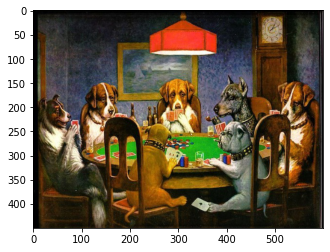

In [5]:
#Now use vmin = 0 and vmax = 1
plt.imshow(img, vmin=0,
    vmax=1)
plt.show()

Moving forward, we are going to want to build our KMeans algorithm by taking all of the RGB pixels (meaning the 3 values per pixel) and clustering them into groups of similar pixels. To do this, we are going to want to have 3 columns corresponding to each of the three colors, and then length*width number of rows corresponding to each pixel that we want to cluster. We will transform our data using reshape but hold on to the original image shape for when we want to translate it back into a 3D array for plotting.

In [6]:
#Hold the shape of the image in a variable
img_shape = img.shape
print(img_shape)

(450, 600, 3)


In [7]:
#Now let's reshape into a 2D array for feeding into our KMeans model
X = img.reshape(img_shape[0]*img_shape[1], img_shape[2])
print(X)

[[0.00392157 0.00392157 0.        ]
 [0.00392157 0.00392157 0.        ]
 [0.         0.         0.        ]
 ...
 [0.33333333 0.31764706 0.30588235]
 [0.00784314 0.00392157 0.        ]
 [0.01176471 0.01176471 0.00392157]]


Notice that we have now a 2D array that we can train our KMeans model with. We if course can reshape our data back as well like so where we specify the three shape arguments we held onto....

In [8]:
reversed_img = X.reshape(img_shape[0],img_shape[1], img_shape[2])
print(reversed_img)

[[[0.00392157 0.00392157 0.        ]
  [0.00392157 0.00392157 0.        ]
  [0.         0.         0.        ]
  ...
  [0.00784314 0.         0.00392157]
  [0.05490196 0.03921569 0.03529412]
  [0.0627451  0.02745098 0.03137255]]

 [[0.00784314 0.00784314 0.        ]
  [0.00784314 0.00784314 0.        ]
  [0.00392157 0.00392157 0.        ]
  ...
  [0.00392157 0.         0.        ]
  [0.09019608 0.0745098  0.07058824]
  [0.1254902  0.09019608 0.09411765]]

 [[0.00392157 0.00392157 0.        ]
  [0.01176471 0.01176471 0.00392157]
  [0.00784314 0.00784314 0.        ]
  ...
  [0.00392157 0.         0.        ]
  [0.14901961 0.13333333 0.12941176]
  [0.21568627 0.18039216 0.18431373]]

 ...

 [[0.         0.00784314 0.00392157]
  [0.         0.00784314 0.00392157]
  [0.00392157 0.00392157 0.        ]
  ...
  [0.3372549  0.32156863 0.30980392]
  [0.00392157 0.         0.        ]
  [0.01176471 0.01176471 0.00392157]]

 [[0.00392157 0.00392157 0.00392157]
  [0.00392157 0.00392157 0.00392157]


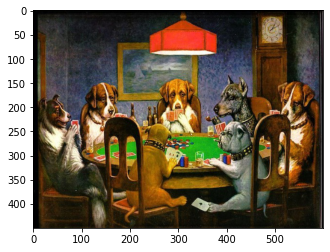

In [9]:
#Just as a check, we can see if the image is the same
plt.imshow(reversed_img, vmin=0,vmax=1)
plt.show()

## Using the sklearn's KMeans Algorithm

The sklearn library has a handy KMeans algorithm already written for you which you can use. First we can import it and create an instance of the model. It will take as an argument the number of clusters we want to build.

Take a step back for a second, what does the number of clusters mean in the context of this project? It means the number of colors that we will find as the "center" of different clusters of colors. For example, if we had mostly red and green in the picture, we would expect to get back two clusters where the cluster center is red for one and green for the other. Let's first work with using four clusters.

In [10]:
from sklearn.cluster import KMeans

#Create a model with 4 clusters
model = KMeans(n_clusters=4)

Once we make the model, we fit it by calling fit and passing in our data to fit with. In this case, we have the X variable from before holding our data.

In [11]:
import numpy as np

#Set the seed
np.random.seed(1)

#Fit the model
model = model.fit(X)

Let's go through a few of the attributes now. First of all, there will now be 4 cluster centers. We can get it back from the attribute cluster_centers_.

In [12]:
#Report the cluster centers
print(model.cluster_centers_)

[[0.63052206 0.35656398 0.09485633]
 [0.14324513 0.11149619 0.06230063]
 [0.82655272 0.76054029 0.62328195]
 [0.34061374 0.38111133 0.34026588]]


There is also the attribute labels_ which finds the labels for each of the points. This label is the closest cluster center for each point.

In [13]:
#Likewise, we can get labels
print(model.labels_)

[1 1 1 ... 3 1 1]


Now, if we index the cluster center by the labels, we will get back the cluster center assigned to each point! This is helpful because then we can assign the value of the cluster center to every point. This is very useful when you want to do something like image compression and only use a few colors to save on space. Let's first find the Y values.

In [14]:
#Index the cluster centers with the model labels
Y = model.cluster_centers_[model.labels_]
print(Y)

[[0.14324513 0.11149619 0.06230063]
 [0.14324513 0.11149619 0.06230063]
 [0.14324513 0.11149619 0.06230063]
 ...
 [0.34061374 0.38111133 0.34026588]
 [0.14324513 0.11149619 0.06230063]
 [0.14324513 0.11149619 0.06230063]]


As we did before, we can reshape the array to get back to the original shape.

In [15]:
#Reshape the array
Y = Y.reshape(img_shape)

Finally we get to see what the image looks like when we only use four colors!

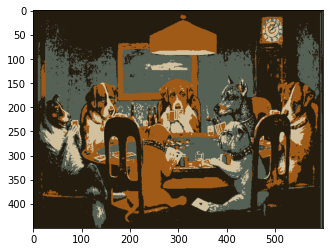

In [16]:
#Show the replicated images
plt.imshow(Y, vmin=0,vmax=1)
plt.show()

This is only four different colors but notice how it actaully looks fairly similar to the original picture! Now we can experiment with a different number of clusters.

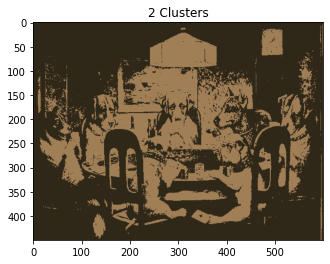

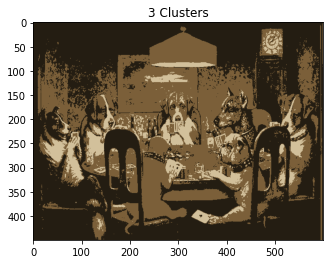

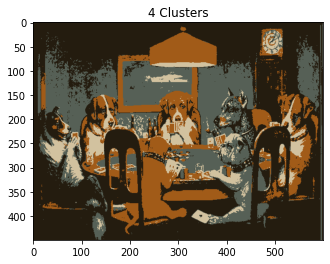

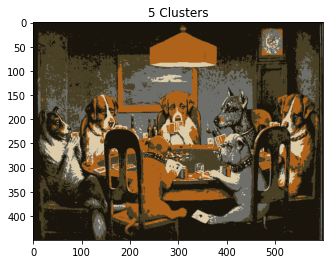

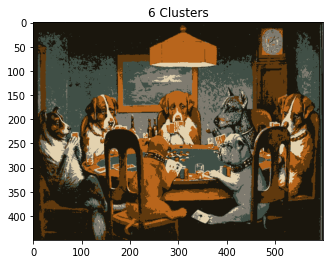

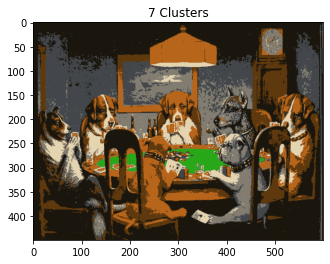

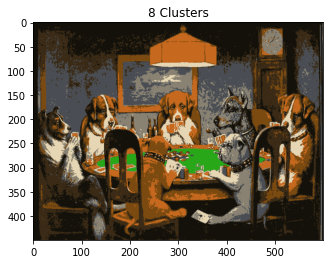

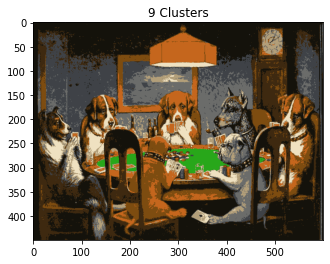

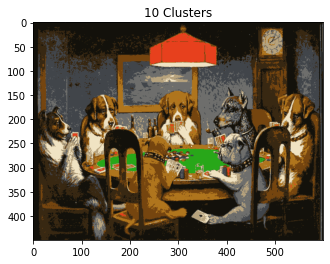

In [17]:
#Set the seed to make it easy to replicate
np.random.seed(0)

#Try different numbers of clusters
for n_clusters in range(2,11):
    #Create the model
    model = KMeans(n_clusters=n_clusters).fit(X)
    
    #Find the replicated image
    Y = model.cluster_centers_[model.labels_]
    Y = Y.reshape(img_shape)
    
    #Plot the replicated image
    plt.imshow(Y, vmin=0,vmax=1)
    plt.title("{} Clusters".format(n_clusters))
    plt.show()

The final cool thing that we can do if we want is to show the cluster centers as a palette of colors by simply passing it in as a nested list like below.

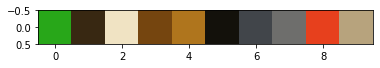

In [18]:
#We can get the colors used if we were interested
plt.imshow([model.cluster_centers_])
plt.show()

Those are the 10 different colors which are present in the image!